<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/3DV/labs/cv06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6th Lab - Triangulation

In this lab you will find correspondences in two images using SuperPoint + SuperGlue. Then you will obtain a 3D pointcloud of the matched points and visualize it.

In [ ]:
import sympy as sp
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import display

## Images

We will download the same images as last time

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv05_img_1.png
!wget https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv05_img_2.png

--2023-03-21 11:24:20--  https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv05_img_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 494694 (483K) [image/png]
Saving to: ‘cv05_img_1.png.1’

cv05_img_1.png.1    100%[===================>] 483.10K  --.-KB/s    in 0.03s   

2023-03-21 11:24:21 (17.0 MB/s) - ‘cv05_img_1.png.1’ saved [494694/494694]

--2023-03-21 11:24:21--  https://raw.githubusercontent.com/kocurvik/edu/master/3DV/labs/resources/cv05_img_2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

In [ ]:
%matplotlib inline
img1 = cv2.imread('cv05_img_1.png')
img2 = cv2.imread('cv05_img_2.png')

fx = 525.0  # focal length x
fy = 525.0  # focal length y
cx = 319.5  # optical center x
cy = 239.5  # optical center y
gt_K = np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]])

plt.imshow(img1[:, :, ::-1])
plt.show()
plt.imshow(img2[:, :, ::-1])
plt.show()

## Visualizing PointCloud data

To finish the last exercise you need to visualize the obtained 3D points. You can use this function to create an interactive plot using plotly.

In [ ]:
import plotly.express as px

def plot_interactive_pointcloud(xyz, rgb, marker_size=3):
  # plots a plotly pointcloud
  # params:
  # xyz - n x 3 - array with 3D coordinates of points
  # rgb - n x 3 - array with RGB triplets in 0-255

  fig = px.scatter_3d(x = xyz[:, 0], y = xyz[:, 1], z=xyz[:, 2], color=["{}".format(c) for c in colors], color_discrete_map={"{}".format(c): "rgb ({}, {}, {})".format(*c) for c in colors})
  fig.update_traces(marker={'size': marker_size})
  fig.show()

## Exercise SuperPoint + SuperGlue (2.5 points)

Your task will now be to clone the repository https://github.com/magicleap/SuperGluePretrainedNetwork and perform keypoint detection and matching on the givne images. Feel free to use any approach that you prefer. You can use the provided scripts and load the correspondeces from an output file or you can import the relevant objects/methods from the repository and use them in python.

To finish the task you should create three visualizations. Points in both images and then a third image showing both of the images side by side with lines connecting the matched points.

### Some Notes

**Drawing**

To create the images you should use `cv.circle` and `cv.line`. Note that if you import some of the code from the repository it might override some matplolib settings making it impossible to plot images within Colab. To fix this simply call `%matplotlib inline` before plotting.

**Torch Tensors**

You may also need to convert data from the pytorch `Tensor` class to a numpy array. You can simply do this by using the method `.numpy()`. If you need to determine a `device` parameter simply use `'cpu'` as we are not using any gpus.

**Changing Directory**

We are used to calling shell commands using `!` but this creates a virtual shell to execute the given command. In order to change directory you have to use `%cd dir_name`

In [ ]:
!git clone https://github.com/magicleap/SuperGluePretrainedNetwork
%cd SuperGluePretrainedNetwork
...

fatal: destination path 'SuperGluePretrainedNetwork' already exists and is not an empty directory.
/content/SuperGluePretrainedNetwork


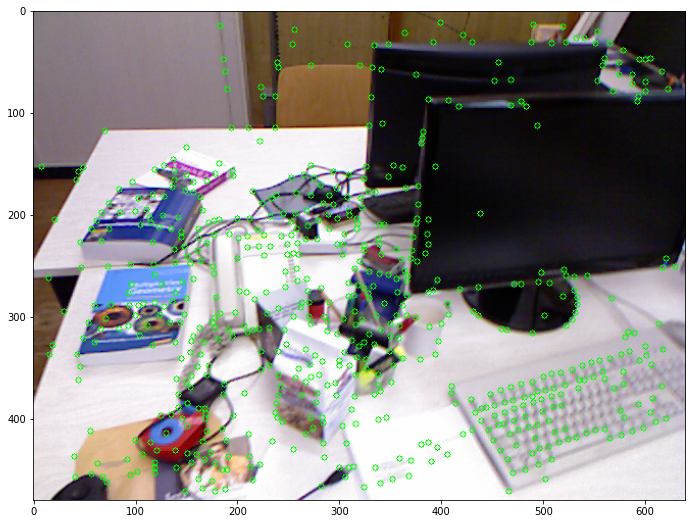

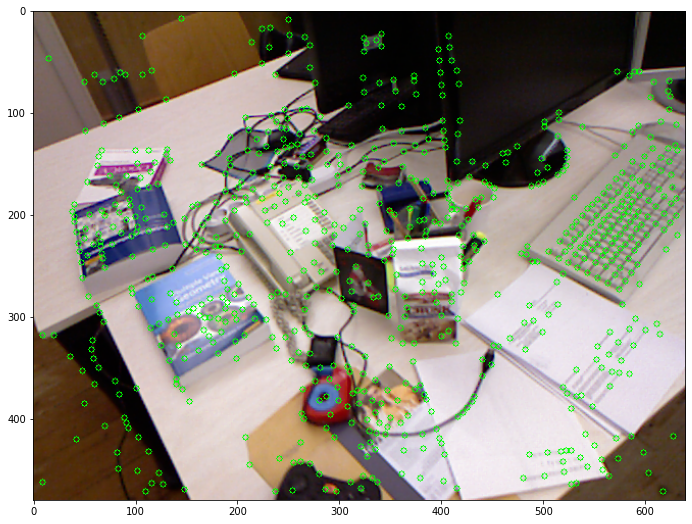

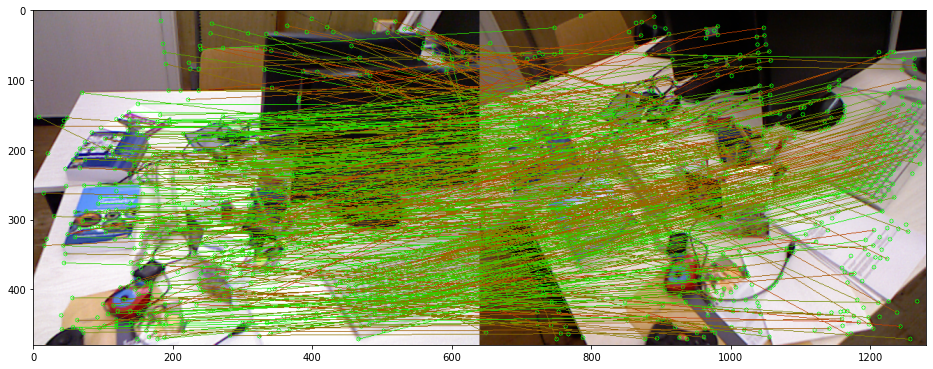

In [ ]:
...

## Exercise - Triangulation (2.5 points)

In this exercise you will have to triangulate the points. In order to do so you can use the [opencv methods](https://docs.opencv.org/4.7.0/d9/d0c/group__calib3d.html). Namely you should use `cv2.findFundamentalMat` or `cv2.findEssentialMat`. Then you should use `cv2.recoverPose` and `cv2.triangulatePoints`. Keep in mind, that you should only triangulate the inliers. Both the Essential/Fundamental matrix estimation and recoverPose provides these for you.

Finally you should use the method `plot_interactive_pointcloud` provided above to visualize the point cloud.

*Note:* OpenCV uses different input formats for different methods. Same with outputs. Keep this in mind and read the documentation/print out the outputs.


In [ ]:
...